            Score  CorrectData  SubsequentPerfectScore
count  133.000000   133.000000              133.000000
mean   189.270677   280.383459              255.646617
std     80.069111    79.126742               75.755807
min     40.000000   156.000000              132.000000
25%    122.000000   214.000000              196.000000
50%    176.000000   260.000000              242.000000
75%    232.000000   347.000000              330.000000
max    377.000000   484.000000              408.000000


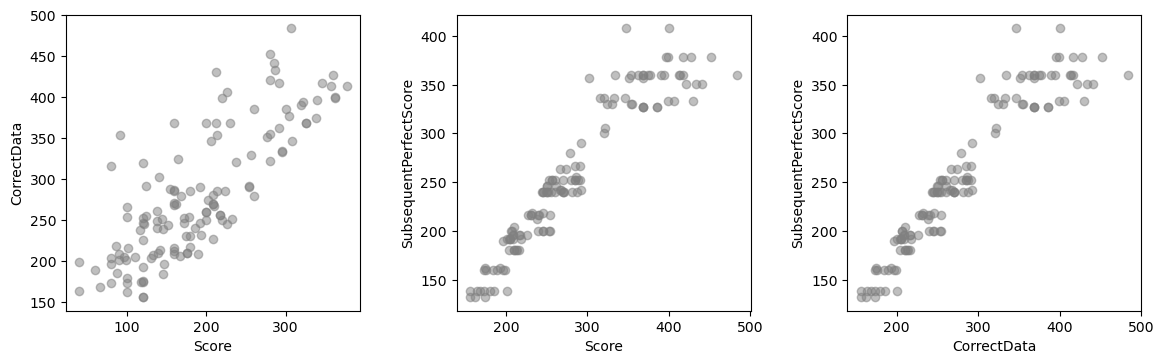

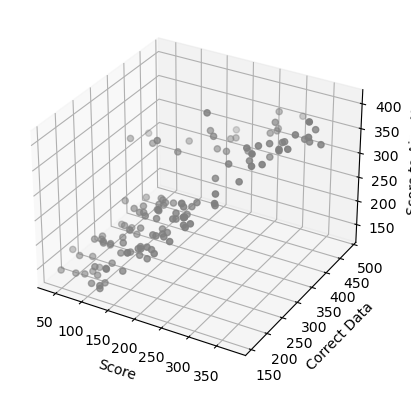

AIC: 6.071937729569026
BIC: 9.728565204173627
Predicted Values (y_pred):  [238. 219. 214. 348. 227. 260. 330. 343. 175. 386. 177. 148. 370. 217.
 421. 239. 198. 146. 194. 247. 299. 197. 323. 228. 170.]
Mean Squared Error: 429.52
R-Squared: 0.9283989367462151
Mean Absolute Error: 15.92
Median Absolute Error: 13.0
RMSE: 20.72486429388622
Intercept: 11.843014003940112
Coefficients: [0.1897767  0.72575744]


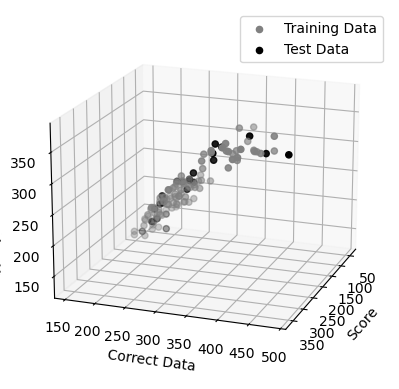

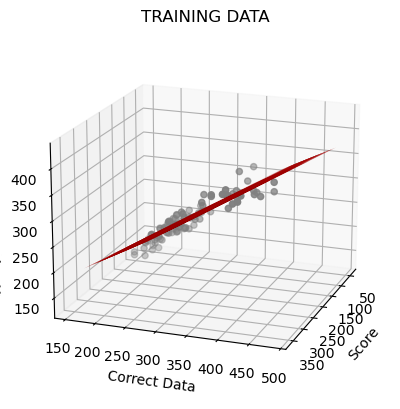

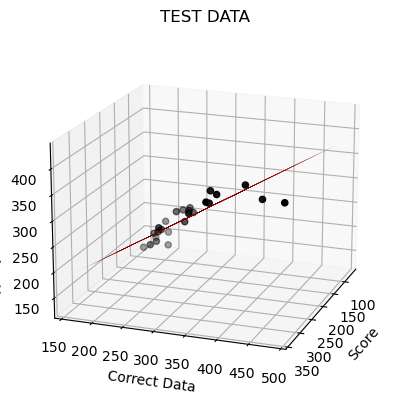

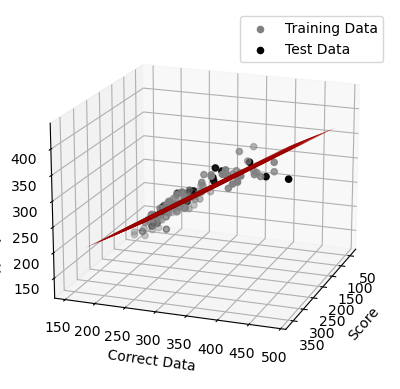


Test with specific values:
Inputs: SCORE    QUANTITY        Output:
        120      196              176
        140      178              167
        360      431              392
        140      233              207
        288      461              401
        160      476              387
        280      299              281
Cross-validation scores: [-0.46314766  0.88395067  0.83384013  0.9331996   0.91793184  0.82383547
  0.85081859]
Mean R-squared: 0.6829183756237109
Mean squared error: 313.37985146410256
Root mean squared error: 17.047861453041087
Mean absolute error: 13.748408553247275
Median absolute error: 11.92043615268741
    k  R-squared         MSE       RMSE        MAE      MedAE
0   2   0.896433  473.845731  21.714649  16.472297  14.748410
1   3   0.890865  428.320277  20.629927  16.013775  14.388888
2   4   0.852901  368.941433  19.076528  14.730803  12.772012
3   5   0.838191  342.556472  18.188595  14.305168  13.284262
4   6   0.725104  346.272385  17.862046  14.

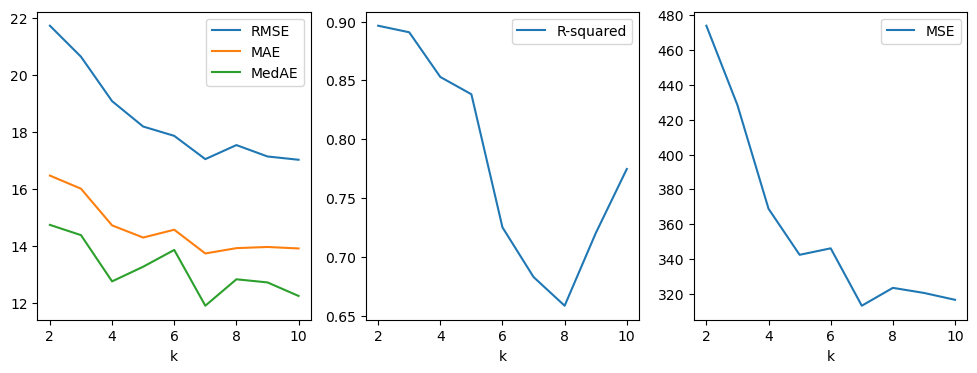

    k  R-squared       MSE      RMSE       MAE     MedAE
0   2   1.000000  1.000000  1.000000  1.000000  1.000000
1   3   0.953195  0.432584  0.537270  0.663333  0.745738
2   4   0.634030 -0.307497 -0.125392 -0.278682 -0.397749
3   5   0.510357 -0.636351 -0.504174 -0.591202 -0.035475
4   6  -0.440372 -0.590037 -0.643476 -0.390182  0.379973
5   7  -0.795025 -1.000000 -0.990798 -1.000000 -1.000000
6   8  -1.000000 -0.872390 -0.781032 -0.863439 -0.346307
7   9  -0.482074 -0.908622 -0.951124 -0.833313 -0.423449
8  10  -0.023265 -0.957774 -1.000000 -0.871633 -0.758098


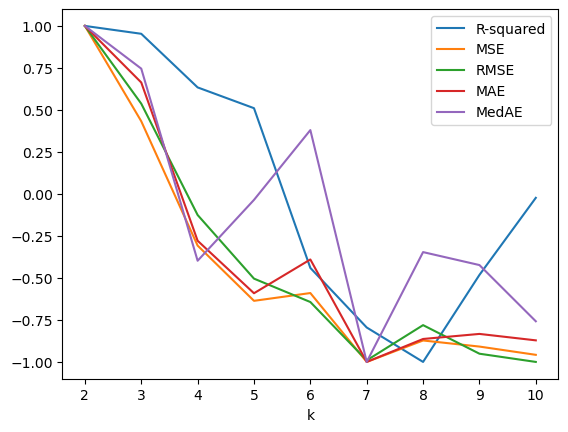

In [1]:
# Multiple Linear Regression

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler




# Load the data into a DataFrame
# subfolder = 'Project/'     # Terminal
subfolder = '../'           # Jupyter
df = pd.read_excel(f"{subfolder}Dataset/Dataset.xlsx")

# Save the DataFrame to a CSV file with ',' as the delimiter
df.to_csv("Dataset.csv", index=False, sep=',')

# Importing the dataset
dataset = pd.read_csv('Dataset.csv')
print(dataset.describe())


X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values




# extract the x, y, and z variables from the data
a = dataset['Score']
b = dataset['CorrectData']
c = dataset['SubsequentPerfectScore']

# create a figure with 3 subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# plot x vs. y in the first subplot
axs[0].scatter(a, b, alpha=0.5, c='gray', marker='o')
axs[0].set_xlabel('Score')
axs[0].set_ylabel('CorrectData')

# plot x vs. z in the second subplot
axs[1].scatter(b, c, alpha=0.5, c='gray', marker='o')
axs[1].set_xlabel('Score')
axs[1].set_ylabel('SubsequentPerfectScore')

# plot y vs. z in the third subplot
axs[2].scatter(b, c, alpha=0.5, c='gray', marker='o')
axs[2].set_xlabel('CorrectData')
axs[2].set_ylabel('SubsequentPerfectScore')

# display the plots
fig.tight_layout(pad=2.0)
# plt.savefig("Plots.png", dpi=150)
plt.show()




# ALL DATA
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], y, c='gray', marker='o')
ax.set_xlabel('Score')
ax.set_ylabel('Correct Data')
ax.set_zlabel('Score to Aim At')
plt.show()




### DATA CLEANING
# Remove obsolete rows (just so as not to confuse the model)
mask = dataset['CorrectData'] < dataset['SubsequentPerfectScore']
dataset = dataset.drop(dataset[mask].index)
mask = dataset['SubsequentPerfectScore'] < dataset['Score']
dataset = dataset.drop(dataset[mask].index)


X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values


# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)




# Calculate the log-likelihood of the data
log_likelihood = -0.5 * np.sum(np.square(y_test - regressor.predict(X_test))) / (np.var(y_test) * len(y_test))

# Calculate the AIC and BIC scores
n = len(y_test)
p = regressor.coef_.shape[0] + 1 # number of parameters in the model
aic = -2 * log_likelihood + 2 * p
bic = -2 * log_likelihood + np.log(n) * p

print("AIC:", aic)
print("BIC:", bic)




# Predicting the Test set results
y_pred = np.round(regressor.predict(X_test))
print("Predicted Values (y_pred): ", y_pred)



# Performance Measures
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test, y_pred)
print("R-Squared:", r2)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)
mdae = median_absolute_error(y_test, y_pred)
print("Median Absolute Error:", mdae)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
# Check the intercept and coefficients of the model
print("Intercept:", regressor.intercept_)
print("Coefficients:", regressor.coef_)








# SPLIT + NO PLANE
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:,0], X_train[:,1], y_train, c='gray', marker='o')
ax.scatter(X_test[:,0], X_test[:,1], y_test, c='black', marker='o')
ax.set_xlabel('Score')
ax.set_ylabel('Correct Data')
ax.set_zlabel('Score to Aim At')
ax.legend(['Training Data', 'Test Data'])


# # Create a plane to project the predictions on
# xx, yy = np.meshgrid(X_test[:,0], X_test[:,1])
# zz = regressor.intercept_ + regressor.coef_[0] * xx + regressor.coef_[1] * yy
# ax.plot_surface(xx, yy, zz, color='red', alpha=0.2)

# Set the angle of the plot
ax.view_init(elev=18, azim=20)
plt.show()



# TRAIN + PLANE
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:,0], X_train[:,1], y_train, c='gray', marker='o')
# ax.scatter(X_test[:,0], X_test[:,1], y_test, c='black', marker='o')
ax.set_xlabel('Score')
ax.set_ylabel('Correct Data')
ax.set_zlabel('Score to Aim At')
plt.title('TRAINING DATA')

# Create a plane to project the predictions on
xx, yy = np.meshgrid(X_test[:,0], X_test[:,1])
zz = regressor.intercept_ + regressor.coef_[0] * xx + regressor.coef_[1] * yy
ax.plot_surface(xx, yy, zz, color='red', alpha=0.1)

# Set the angle of the plot
ax.view_init(elev=18, azim=20)
plt.show()


# TEST + PLANE
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# ax.scatter(X_train[:,0], X_train[:,1], y_train, c='gray', marker='o')
ax.scatter(X_test[:,0], X_test[:,1], y_test, c='black', marker='o')
ax.set_xlabel('Score')
ax.set_ylabel('Correct Data')
ax.set_zlabel('Score to Aim At')
plt.title('TEST DATA')

# Create a plane to project the predictions on
xx, yy = np.meshgrid(X_test[:,0], X_test[:,1])
zz = regressor.intercept_ + regressor.coef_[0] * xx + regressor.coef_[1] * yy
ax.plot_surface(xx, yy, zz, color='red', alpha=0.1)

# Set the angle of the plot
ax.view_init(elev=18, azim=20)
plt.show()



# SPLIT + PLANE
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:,0], X_train[:,1], y_train, c='gray', marker='o')
ax.scatter(X_test[:,0], X_test[:,1], y_test, c='black', marker='o')
ax.set_xlabel('Score')
ax.set_ylabel('Correct Data')
ax.set_zlabel('Score to Aim At')
ax.legend(['Training Data', 'Test Data'])

# Create a plane to project the predictions on
xx, yy = np.meshgrid(X_test[:,0], X_test[:,1])
zz = regressor.intercept_ + regressor.coef_[0] * xx + regressor.coef_[1] * yy
ax.plot_surface(xx, yy, zz, color='red', alpha=0.1)

# Set the angle of the plot
ax.view_init(elev=18, azim=20)
plt.show()






# plt.scatter(dataset['CorrectData'], dataset['Score'])
# plt.xlabel('Correct Data')
# plt.ylabel('Score')
# plt.show()





# test specific values
print('\nTest with specific values:')
print('Inputs: SCORE    QUANTITY        Output:')
print('        120      196             ', int(regressor.predict(np.array([[120, 196]]))))
print('        140      178             ', int(regressor.predict(np.array([[140, 178]]))))
print('        360      431             ', int(regressor.predict(np.array([[360, 431]]))))
print('        140      233             ', int(regressor.predict(np.array([[140, 233]]))))
print('        288      461             ', int(regressor.predict(np.array([[288, 461]]))))
print('        160      476             ', int(regressor.predict(np.array([[160, 476]]))))
print('        280      299             ', int(regressor.predict(np.array([[280, 299]]))))





### CROSS VALIDATION ###
from sklearn.model_selection import KFold, cross_val_score

# # Define number of folds for cross-validation
# k = 5

# # Initialize k-fold cross-validation object
# kf = KFold(n_splits=k)

# # Initialize linear regression model
# lr = LinearRegression()

# # Initialize list to store mean squared errors for each fold
# mse_list = []

# # Perform k-fold cross-validation
# for train_index, test_index in kf.split(X):
#     # Split data into training and testing subsets
#     X_train, X_test = X[train_index], X[test_index]
#     y_train, y_test = y[train_index], y[test_index]
    
#     # Fit linear regression model to training data
#     lr.fit(X_train, y_train)
    
#     # Predict target variable on test data
#     y_pred = lr.predict(X_test)
    
#     # Compute mean squared error on test data
#     mse = mean_squared_error(y_test, y_pred)
    
#     # Append mean squared error to list
#     mse_list.append(mse)

# # Compute average mean squared error across all folds
# avg_mse = np.mean(mse_list)
# print("Average mean squared error: ", avg_mse)

# avg_rmse = np.sqrt(avg_mse)
# print("Average RMSE:", avg_rmse)


####


# Define number of folds for cross-validation
k = 7

# Perform 5-fold cross validation
cv_scores = cross_val_score(regressor, X, y, cv=k)

# Calculate R-squared for each fold
r2_scores = cross_val_score(regressor, X, y, cv=k, scoring='r2')

# Calculate mean squared error for each fold
mse_scores = cross_val_score(regressor, X, y, cv=k, scoring='neg_mean_squared_error')
mse_scores = abs(mse_scores)

# Calculate root mean squared error for each fold
rmse_scores = np.sqrt(mse_scores)

# Calculate mean absolute error for each fold
mae_scores = cross_val_score(regressor, X, y, cv=k, scoring='neg_mean_absolute_error')
mae_scores = abs(mae_scores)

# Calculate median absolute error for each fold
medae_scores = cross_val_score(regressor, X, y, cv=k, scoring='neg_median_absolute_error')
medae_scores = abs(medae_scores)

# Print the results
print("Cross-validation scores:", cv_scores)
print("Mean R-squared:", np.mean(r2_scores))
print("Mean squared error:", np.mean(mse_scores))
print("Root mean squared error:", np.mean(rmse_scores))
print("Mean absolute error:", np.mean(mae_scores))
print("Median absolute error:", np.mean(medae_scores))




# Define different values of k for cross-validation
k_values = [2, 3, 4, 5, 6, 7, 8, 9, 10]

# Initialize empty lists to store the results
r2_scores = []
mse_scores = []
rmse_scores = []
mae_scores = []
medae_scores = []

# Loop over different k values and perform cross-validation
for k in k_values:
    # Perform k-fold cross-validation
    cv_scores = cross_val_score(regressor, X, y, cv=k)

    # Calculate R-squared for each fold
    r2 = cross_val_score(regressor, X, y, cv=k, scoring='r2')
    r2_scores.append(np.mean(r2))

    # Calculate mean squared error for each fold
    mse = cross_val_score(regressor, X, y, cv=k, scoring='neg_mean_squared_error')
    mse = abs(mse)
    mse_scores.append(np.mean(mse))

    # Calculate root mean squared error for each fold
    rmse = np.sqrt(mse)
    rmse_scores.append(np.mean(rmse))

    # Calculate mean absolute error for each fold
    mae = cross_val_score(regressor, X, y, cv=k, scoring='neg_mean_absolute_error')
    mae = abs(mae)
    mae_scores.append(np.mean(mae))

    # Calculate median absolute error for each fold
    medae = cross_val_score(regressor, X, y, cv=k, scoring='neg_median_absolute_error')
    medae = abs(medae)
    medae_scores.append(np.mean(medae))

# Store results in a dataframe
results_df = pd.DataFrame({
    'k': k_values,
    'R-squared': r2_scores,
    'MSE': mse_scores,
    'RMSE': rmse_scores,
    'MAE': mae_scores,
    'MedAE': medae_scores
})

# Print results in tabular form
print(results_df)

# create a figure with 3 subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Plot RMSE, MAE, and MedAE together
# fig, ax = plt.subplots()
axs[0].plot(k_values, rmse_scores, label='RMSE')
axs[0].plot(k_values, mae_scores, label='MAE')
axs[0].plot(k_values, medae_scores, label='MedAE')
axs[0].set_xlabel('k')
axs[0].legend()
# plt.show()

# Plot MSE separately
# fig, ax = plt.subplots()
axs[1].plot(k_values, r2_scores, label='R-squared')
axs[1].set_xlabel('k')
axs[1].legend()
# plt.show()

# Plot R-squared separately
# fig, ax = plt.subplots()
axs[2].plot(k_values, mse_scores, label='MSE')
axs[2].set_xlabel('k')
axs[2].legend()
plt.show()

# Scale the performance measures using standardization
# scaler = StandardScaler()

# Scale the scores to a range of -1 to 1
scaler = MinMaxScaler(feature_range=(-1, 1))
r2_scores = scaler.fit_transform(np.array(r2_scores).reshape(-1, 1)).flatten()
mse_scores = scaler.fit_transform(np.array(mse_scores).reshape(-1, 1)).flatten()
rmse_scores = scaler.fit_transform(np.array(rmse_scores).reshape(-1, 1)).flatten()
mae_scores = scaler.fit_transform(np.array(mae_scores).reshape(-1, 1)).flatten()
medae_scores = scaler.fit_transform(np.array(medae_scores).reshape(-1, 1)).flatten()


# Store results in a dataframe
results_df = pd.DataFrame({
    'k': k_values,
    'R-squared': r2_scores,
    'MSE': mse_scores,
    'RMSE': rmse_scores,
    'MAE': mae_scores,
    'MedAE': medae_scores
})

# Print results in tabular form
print(results_df)

# Plot results in graphical form
fig, ax = plt.subplots()
ax.plot(k_values, r2_scores, label='R-squared')
ax.plot(k_values, mse_scores, label='MSE')
ax.plot(k_values, rmse_scores, label='RMSE')
ax.plot(k_values, mae_scores, label='MAE')
ax.plot(k_values, medae_scores, label='MedAE')
ax.set_xlabel('k')
ax.legend()
plt.show()